# <center>Deep Learning(Rock Scissors Paper)</center>

## 데이터를 준비하자
---
>웹캠이 없다면?
>
>일단은 아래 내용을 쭉 읽고 숙지해주세요! 웹캠이 없는 경우 라는 토글에서 기다리고 있겠습니다. 물론 웹캠이 있다면 꼭 아래 내용을 따라해주세요

데이터 만들기

(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요?


걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다. 아래 사이트에서 Get Started 버튼을 눌러보세요. 그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

- https://teachablemachine.withgoogle.com/

(2) 먼저 가위 이미지 데이터를 만들어 봅시다. 웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다. 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

- 여러 각도에서 찍어보세요.
- 여러 크기로 찍어보세요.
- 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
- 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-9.max-800x600.png)


주의 만약 웹캠 사용 버튼을 눌렀을 때 아래 화면처럼 에러가 난다면, 브라우저에서 웹캠을 사용할 수 있는 권한을 허용해 주어야 합니다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-10.max-800x600.png)

(3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.
![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-1-11.png)

(4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해주세요. 바위와 보 이미지들에 대해서도 위 과정을 진행하세요. (각각 "rock.zip", "paper.zip" 이름으로 저장해주세요.)

디렉토리 만들기
이제 클라우드에 실습용 디렉토리 rock_scissor_paper 및 하위 디렉토리들을 만들어, 데이터셋을 올릴 차례입니다!

>토막 리눅스 사용법
>
>mkdir -p : mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게되면 "디렉토리를 생성할 수 없습니다." 라는 메시지가 나오는데, -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 됩니다.

이미지 업로드 방법

1. 오른쪽 메뉴에서 Cloud Jupyter를 열어주세요.
2. rock.zip을 올리고 싶다면 rock_scissor_paper/rock 디렉토리로 이동 후, Upload버튼을 눌러주세요. 드래그 앤 드롭도 가능합니다.
3. 가위와 보 데이터셋에 대해서도 위 과정을 진행해주세요.

여기까지 성공하셨다면 아래와 같은 구조를 갖고 있을 것입니다.

**데이터 불러오기 + Resize 하기**

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

In [36]:
import tensorflow as tf
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

import PIL
from PIL import Image, ImageEnhance
import glob
import os

print(tf.__version__)
print(np.__version__)

2.9.0
1.24.1


이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다. 아래 코드를 실행해보세요. 이미지의 크기가 28x28 로 바뀌었나요?<br>
**--> 112 x 112 사이즈로 변경 및 kaggle의 가위바위보 png 분류 데이터 사용으로 변경**

In [54]:
# 색 반전 참고: https://intrepidgeeks.com/tutorial/method-of-inverting-image-color-using-pil-python-imaging
# greyscale 참고: 
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 112*112 사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img = new_img.convert('L')
        new_img.save(img.split('.')[0] + ".jpg", "JPEG")
    
    print(len(images), " images resized.")



In [55]:
# 가위 이미지가 저장된 디렉토리
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/train/scissor/"
# resize
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/train/rock/"

# resize
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보이미지가 저장된 디렉토리 
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/train/paper/"

# resize
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

839  images to be resized.
839  images resized.
가위 이미지 resize 완료!
840  images to be resized.
840  images resized.
바위 이미지 resize 완료!
840  images to be resized.
840  images resized.
보 이미지 resize 완료!


In [58]:
def load_data(img_path, number_of_data):  # 가위/바위/보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=1
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:]=img.reshape(img_size,img_size, color)
        # imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:]=img.reshape(img_size,img_size, color)
        # imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:]=img.reshape(img_size,img_size, color)
        # imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("변환한 데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [59]:
from sklearn.model_selection import train_test_split
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/train"
(x_train, y_train)=load_data(image_dir_path, number_of_data=2519)
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.2)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_val_norm = x_val/255.0


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

변환한 데이터의 이미지 개수는 2519 입니다.
x_train shape: (2015, 112, 112, 1)
y_train shape: (2015,)
x_val shape: (504, 112, 112, 1)
y_val shape: (504,)


라벨:  2


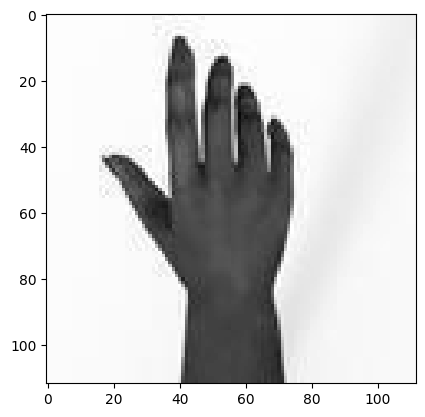

In [61]:
plt.imshow(x_train[1000], cmap='gray', vmin=0, vmax=255)
print('라벨: ', y_train[1000])

## 딥러닝 네트워크 설계하기
자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [64]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(112,112,1))) # 수정사항
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 110, 110, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 55, 55, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 53, 53, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (

## 딥러닝 네트워크 학습시키기
잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [65]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
x_train_reshaped = x_train_norm.reshape( -1, 112, 112, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_val_reshaped = x_val_norm.reshape(-1,112,112,1)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_reshaped, y_train, epochs=10, validation_data=(x_val_reshaped, y_val))

Epoch 1/10


2023-01-03 01:40:31.545031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.6362 - accuracy: 0.7385

2023-01-03 01:40:33.367498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 28ms/step - loss: 0.6362 - accuracy: 0.7385 - val_loss: 0.1330 - val_accuracy: 0.9742
Epoch 2/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0566 - accuracy: 0.9901 - val_loss: 0.0194 - val_accuracy: 0.9980
Epoch 3/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0155 - accuracy: 0.9975 - val_loss: 0.0101 - val_accuracy: 0.9980
Epoch 4/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 6/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/10
63/63 [======

## 얼마나 잘 만들었는지 확인하기(테스트)
여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)

우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

In [66]:
def resize_test_images(image_dir_path):
    images=glob.glob(image_dir_path + "/*.jpg")  
    
    print(len(images), "images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img = new_img.convert('L')
        contrast = ImageEnhance.Contrast(new_img)
        new_img = contrast.enhance(1.5)
        brightness = ImageEnhance.Brightness(new_img)
        new_img = brightness.enhance(1.5)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")



In [73]:
# scissor
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/test/scissor"
resize_test_images(image_dir_path)
# rock
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/test/rock"
resize_test_images(image_dir_path)
# paper
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/test/paper"
resize_test_images(image_dir_path)


100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.


In [74]:
def load_test_data(image_dir_path, number_of_data):  # 가위/바위/보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=1
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(image_dir_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:]=img.reshape(img_size,img_size, color)
        # imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(image_dir_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:]=img.reshape(img_size,img_size, color)
        # imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(image_dir_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:]=img.reshape(img_size,img_size, color)
        # imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("변환한 데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [75]:
# x_test, y_test를 만들기
image_dir_path = os.getenv("HOME") + "/Documents/projects/Aiffel/lms/projects/data/proj_5/test"
(x_test, y_test)=load_test_data(image_dir_path, number_of_data=300)

변환한 데이터의 이미지 개수는 300 입니다.


label: 0


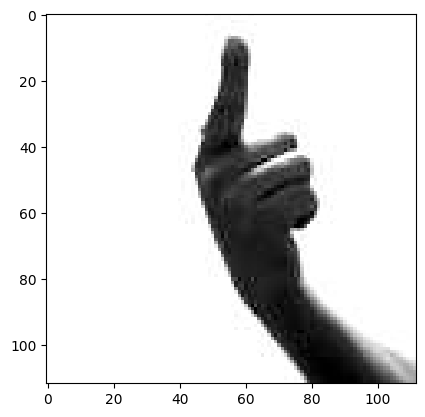

label: 1


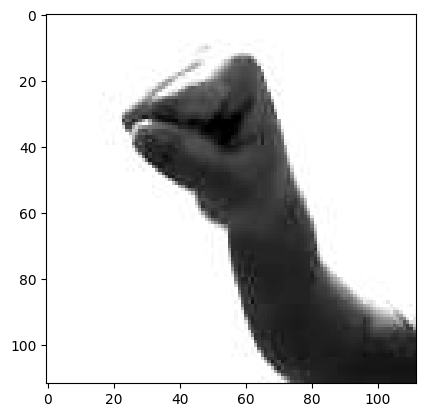

label: 2


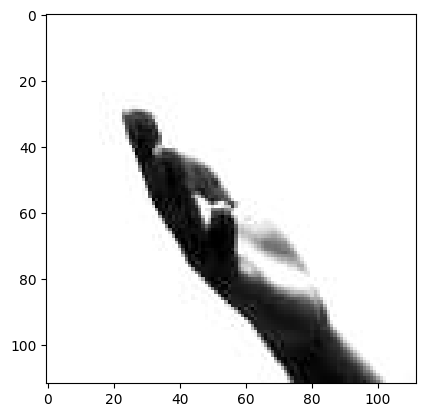

In [76]:
# 이미지 확인
plt.imshow(x_test[0], cmap='gray', vmin=0, vmax=255)
print("label:", y_test[0])
plt.show()
plt.imshow(x_test[100], cmap='gray', vmin=0, vmax=255)
print("label:", y_test[100])
plt.show()
plt.imshow(x_test[202], cmap='gray', vmin=0, vmax=255)
print("label:", y_test[202])
plt.show()

In [80]:
x_test_norm = x_test / 255.0
x_test_reshaped = x_test_norm.reshape( -1, 112, 112, 1)
print(x_test_reshaped.shape)
print(x_test_reshaped[:1,:])

(300, 112, 112, 1)
[[[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.69019608]
   [0.65490196]
   [0.64313725]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.70980392]
   [0.68235294]
   [0.65490196]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.6627451 ]
   [0.65882353]
   [0.63529412]]]]


테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다

In [81]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 4.5591 - accuracy: 0.4533 - 158ms/epoch - 16ms/step
test_loss: 4.559093475341797
test_accuracy: 0.4533333480358124


- 지속적으로 test_accuracy가 33%가 나오는 것으로 확인되었다. 이 현상은 정상적이지 않은 현상으로 수업시간에도 잠깐 언급되었던 사안이다. 우선 어떤 부분이 잘못되었는지 확인해봐야 한다.

In [82]:
test_temp = model.predict(x_test_reshaped)
np.argmax(test_temp, axis = 1)

10/10 [==============================] - 0s 9ms/step


2023-01-03 01:43:36.211638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2,
       0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1,
       2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2])

- 확인결과 모델이 모든 데이터에 대해서 하나로 예측하는 결과 발생 이에 대한 잠재적 원인으로는
    - 정규화(normalize) issue
    - Data 편향 issue
        - png를 convert()를 통해 jpeg로 변환하면서 생긴 데이터의 문제
        - 단순히 데이터가 편향되어 있을 가능성, train or test라벨의 이미지가 한쪽으로 지나치게 치우쳐진경우, 혹은 가위바위보와 상관없이 배경이미지가 영향을 주고 있는 경우
    - overfitting issue


등이 있을 것으로 판단

- 확인결과 test데이터를 변경하자 모델의 예측력이 올라갔으며, 실제 이미지를 확인한 결과 지난 데이터에 비해 배경 등이 없는 보다  neat한 데이터인 것으로 확인됨

## 학습 결과 시각화
### 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등)

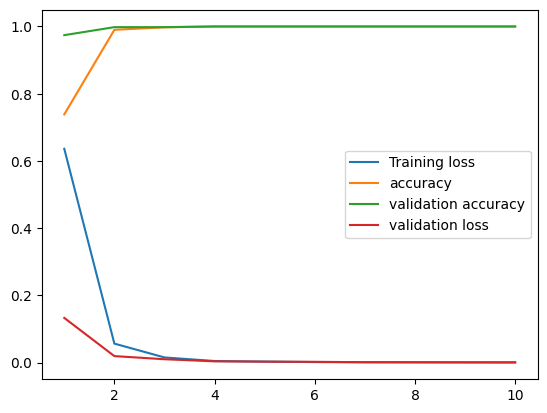

In [83]:
# 참고: https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib
train_loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1,11)

plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.plot(epochs, val_loss, label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
plt.legend()
plt.show()

## 더 좋은 네트워크 만들어보기
시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

## 노드를 마치며...
여러분 미니 프로젝트는 잘 마치셨나요? 여러분은 이번 노드를 통해 다음의 내용을 배웠습니다.
- 이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
- 정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
- 흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
- 분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)

그러면 오늘 배운 내용을 바탕으로 마스크 쓴 사람과 안 쓴 사람을 구분하는 프로젝트도 금방 만드실 수 있겠죠? AIFFEL 입구에서 마스크 안 쓴 사람을 자동으로 감지하고 알람을 주는 시스템을 만들어 주실 용자분 계실까요?!!!

In [84]:
# parameter값 조정
def test_dl(A,B,C,x_train_reshaped, y_train, x_test_reshaped,y_test,D=3, epoch=5):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(A,(3,3), activation='relu', input_shape=(112,112,1)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(B, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(C, activation='relu'))
    model.add(keras.layers.Dense(D, activation='softmax'))
    model.compile(optimizer='adagrad',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

    results = model.fit(x_train_reshaped, y_train, epochs=epoch, validation_data=(x_val_reshaped, y_val), verbose = 1)
    test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
    
    print("\n", f"A = {A}", f"B = {B}",f"C = {C}",f"D = {D}",f"epoch = {epoch}",f"test_loss: {test_loss:.2f}",f"test_accuracy: {test_accuracy:.2f}", f"accuracy: {results.history['accuracy'][-1]: .2f}")
    train_loss = results.history['loss']
    accuracy = results.history['accuracy']
    val_loss = results.history['val_loss']
    val_accuracy = results.history['val_accuracy']

    epochs = range(1,epoch+1)

    plt.plot(epochs, val_accuracy, label='validation accuracy')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.plot(epochs, train_loss, label='Training loss')
    plt.plot(epochs, accuracy, label='accuracy')
    # plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1/40
 1/63 [..............................] - ETA: 19s - loss: 1.1138 - accuracy: 0.3125

2023-01-03 01:47:05.741011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 1.0843 - accuracy: 0.4114

2023-01-03 01:47:07.431745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 28ms/step - loss: 1.0843 - accuracy: 0.4114 - val_loss: 1.0666 - val_accuracy: 0.5099
Epoch 2/40
63/63 [==============================] - 2s 23ms/step - loss: 1.0502 - accuracy: 0.5151 - val_loss: 1.0337 - val_accuracy: 0.5179
Epoch 3/40
63/63 [==============================] - 1s 23ms/step - loss: 1.0113 - accuracy: 0.5613 - val_loss: 1.0045 - val_accuracy: 0.5000
Epoch 4/40
63/63 [==============================] - 1s 23ms/step - loss: 0.9683 - accuracy: 0.5851 - val_loss: 0.9448 - val_accuracy: 0.6290
Epoch 5/40
63/63 [==============================] - 2s 24ms/step - loss: 0.9198 - accuracy: 0.6223 - val_loss: 0.8922 - val_accuracy: 0.6230
Epoch 6/40
63/63 [==============================] - 2s 24ms/step - loss: 0.8638 - accuracy: 0.6615 - val_loss: 0.8294 - val_accuracy: 0.6845
Epoch 7/40
63/63 [==============================] - 1s 23ms/step - loss: 0.8220 - accuracy: 0.6834 - val_loss: 0.7869 - val_accuracy: 0.7579
Epoch 8/40
63/63 [======

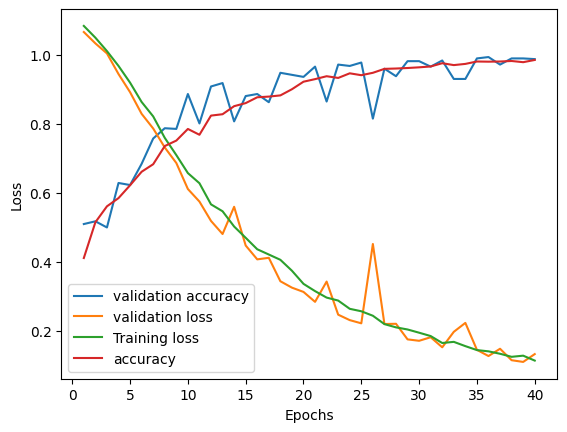

In [88]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_dl(16,32,64, x_train_reshaped, y_train, x_test_reshaped, y_test, D=3, epoch=40)
# ===손글씨 이미지 데이터 903개, 테스트 300개===(train = 루안, 한준, 종호)
# A = 8 B = 16 C = 32 D = 3 epoch = 20 test_loss: 3.17 test_accuracy: 0.47 accuracy:  0.97
# A = 8 B = 16 C = 32 D = 3 epoch = 15 test_loss: 2.22 test_accuracy: 0.49 accuracy:  0.96
# A = 8 B = 16 C = 32 D = 3 epoch = 20 test_loss: 4.31 test_accuracy: 0.50 accuracy:  0.96
# A = 8 B = 32 C = 32 D = 3 epoch = 20 test_loss: 5.00 test_accuracy: 0.51 accuracy:  0.99
# A = 8 B = 32 C = 32 D = 3 epoch = 25 test_loss: 3.90 test_accuracy: 0.51 accuracy:  1.00
# A = 16 B = 32 C = 32 D = 3 epoch = 25 test_loss: 6.91 test_accuracy: 0.48 accuracy:  1.00
# A = 16 B = 32 C = 32 D = 3 epoch = 20 test_loss: 4.19 test_accuracy: 0.53 accuracy:  1.00
# A = 16 B = 32 C = 32 D = 3 epoch = 15 test_loss: 3.45 test_accuracy: 0.50 accuracy:  0.98
# A = 16 B = 32 C = 128 D = 3 epoch = 25 test_loss: 6.82 test_accuracy: 0.52 accuracy:  1.00
# A = 32 B = 64 C = 128 D = 3 epoch = 25 test_loss: 6.88 test_accuracy: 0.47 accuracy:  1.00
# ====optimizer = rmsprop
# A = 32 B = 64 C = 256 D = 3 epoch = 25 test_loss: 7.21 test_accuracy: 0.50 accuracy:  0.99
# A = 16 B = 32 C = 64 D = 3 epoch = 15 test_loss: 4.95 test_accuracy: 0.47 accuracy:  0.95
# A = 16 B = 32 C = 32 D = 3 epoch = 15 test_loss: 3.47 test_accuracy: 0.48 accuracy:  0.96
# A = 16 B = 32 C = 32 D = 3 epoch = 25 test_loss: 2.97 test_accuracy: 0.54 accuracy:  0.98
# ====optimizer = SGD
# A = 32 B = 32 C = 64 D = 3 epoch = 30 test_loss: 1.71 test_accuracy: 0.44 accuracy:  0.78
# ==== train/test Data 변경 - kaggle rock, scissor, paper Data / optimaizer = adam / test_Data = 이경환님데이터
# 33%만 계속 나오는 문제가 지속됨
# ==== train/test Data 변경 - kaggle rock, scissor, paper Data / optimaizer = adam / test_Data = 심한준님데이터
# A = 16 B = 32 C = 64 D = 3 epoch = 20 test_loss: 4.68 test_accuracy: 0.41 accuracy:  1.00
# A = 16 B = 32 C = 64 D = 3 epoch = 5 test_loss: 4.63 test_accuracy: 0.51 accuracy:  1.00
# 이미지 파일 contrast 증가시킴(2step) + training loss 및 accuracy 데이터 확인 하면서 하이퍼 파라미터 미세 조정  
# A = 16 B = 32 C = 64 D = 3 epoch = 4 test_loss: 3.27 test_accuracy: 0.55 accuracy:  1.00
# A = 8 B = 16 C = 32 D = 3 epoch = 3 test_loss: 2.81 test_accuracy: 0.52 accuracy:  1.00
### A = 8 B = 16 C = 32 D = 3 epoch = 4 test_loss: 2.72 test_accuracy: 0.57 accuracy:  1.00 ###
# 이미지 파일 contrast 증가시킴(1.8step)
# A = 8 B = 16 C = 64 D = 3 epoch = 4 test_loss: 3.77 test_accuracy: 0.45 accuracy:  1.00
# A = 8 B = 16 C = 32 D = 3 epoch = 4 test_loss: 3.47 test_accuracy: 0.45 accuracy:  1.00
# A = 16 B = 32 C = 32 D = 3 epoch = 3 test_loss: 2.03 test_accuracy: 0.50 accuracy:  0.98
# A = 16 B = 32 C = 64 D = 3 epoch = 3 test_loss: 2.79 test_accuracy: 0.53 accuracy:  1.00
# 누런 배경을 흰 색으로 인식시켜주기 위해 brightness 1.5증가 
# A = 16 B = 32 C = 64 D = 3 epoch = 4 test_loss: 3.50 test_accuracy: 0.50 accuracy:  1.00
# A = 16 B = 32 C = 64 D = 3 epoch = 3 test_loss: 2.71 test_accuracy: 0.52 accuracy:  1.00
# adagrad로 optimizer변경
# A = 8 B = 16 C = 32 D = 3 epoch = 10 test_loss: 1.20 test_accuracy: 0.51 accuracy:  0.82
# A = 8 B = 16 C = 32 D = 3 epoch = 20 test_loss: 1.47 test_accuracy: 0.49 accuracy:  0.96
# A = 8 B = 32 C = 32 D = 3 epoch = 10 test_loss: 1.47 test_accuracy: 0.49 accuracy:  0.96
# cont 1.8 / bright 1.8
# A = 8 B = 16 C = 32 D = 3 epoch = 30 test_loss: 1.58 test_accuracy: 0.51 accuracy:  0.98
# A = 8 B = 32 C = 64 D = 3 epoch = 30 test_loss: 1.54 test_accuracy: 0.53 accuracy:  0.99
# 그레이 스케일로
# A = 8 B = 16 C = 32 D = 3 epoch = 40 test_loss: 2.10 test_accuracy: 0.46 accuracy:  0.96
# A = 16 B = 32 C = 64 D = 3 epoch = 40 test_loss: 1.82 test_accuracy: 0.48 accuracy:  0.99

- 여러 조합에도 불구하고, 현재 데이터의  accuracy를 높이는 것은 한계가 있어보임
- 흑백사진으로 변경하는 것은 단순화하여 예측력을 높일 수 있지 않을까 기대했지만, 오히려 전반적으로 성능이 떨어지는 것으로 보임
- 최고 57%까지 test accuracy를 올렸으나, 이는 모델이 우수했다기보다는 우연에 기인한 것으로 보임.
- 예측력을 높이기 위해서는 보다 다양한 각도와 상황에서 에서 학습을 할 수 있는 '클린한' 학습데이터 가 필요할 것으로 보임.
    - 이를 위해서는 콘트라스트를 높이고
    - 명도를 조절하는 것 외에도
    - 명확히 사물만 나올 수 있게 크롭하는 것도 생각해볼 수 있음
- 레이어를 더 쌓는 방법
# "GIGO!!"